In [2]:
#import libraries
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 

In [3]:
#load the dataset 
df = pd.read_csv("rainfall_ghana_2013_2023.csv")

In [4]:
df.head()

,Year,Month,Region,Rainfall_mm
0,2013,1,Greater Accra,114.9
1,2013,1,Ashanti,95.9
2,2013,1,Northern,119.4
3,2013,1,Volta,145.7
4,2013,1,Western,93.0


In [5]:
#check for nulls
df.isnull().sum()

Year           0
Month          0
Region         0
Rainfall_mm    0
dtype: int64

In [6]:
#convert months number to months name 
df["Month"] = df["Month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

In [7]:
#Analyse annual rainfall 
#first, group by year and region
annual_rainfall = df.groupby(["Year", "Region"])["Rainfall_mm"].sum().reset_index()

In [8]:
#rearrange the data so that each region becomes a column 
pivot_table = annual_rainfall.pivot(index="Year", columns="Region", values="Rainfall_mm")

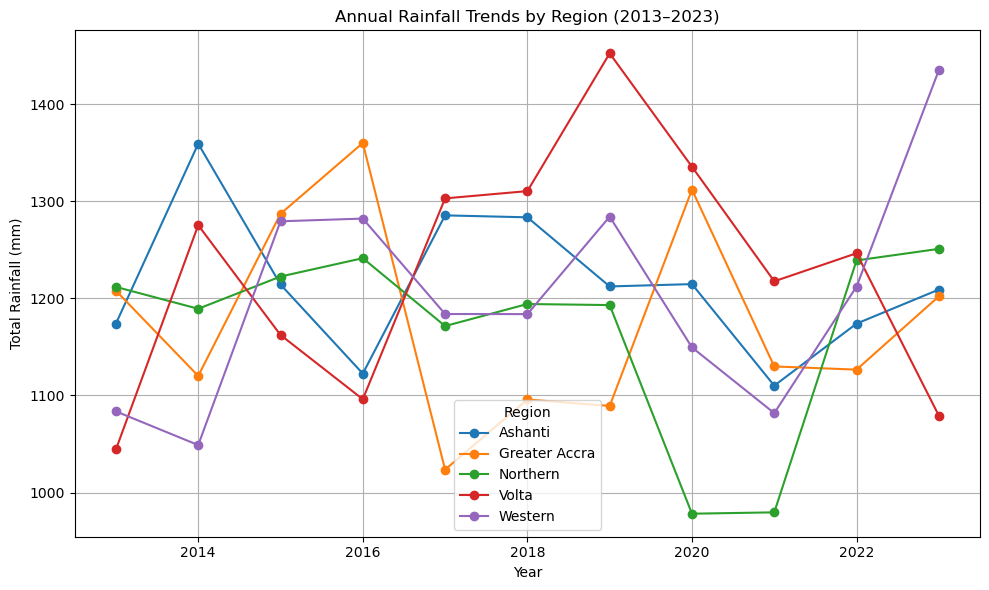

In [9]:
#plot the results 
pivot_table.plot(marker="o", figsize=(10,6))
plt.title("Annual Rainfall Trends by Region (2013–2023)")
plt.ylabel("Total Rainfall (mm)")
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [11]:
#save the file 
annual_rainfall.to_csv('annual_rainfall_by_region.csv', index=False)